## Line magics: 
#### 以%字符开始，该行后面都为指令代码，参数用空格隔开，不需要加引号

## Cell magics:
#### 使用两个百分号%%开始，后面的整个单元(Cell)都是指令代码
#### 注意，%%魔法操作符只在Cell的第一行使用，而且不能嵌套、重复（一个Cell只有一个）。极个别的情况，可以堆叠，但是只用于个别情况。

## Magic操作符列表

In [5]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3  %%rub

In [1]:
time print("hi")

hi
Wall time: 0 ns


In [2]:
%time

Wall time: 0 ns


## 执行Shell脚本

In [3]:
ls -l -h

 驱动器 D 中的卷是 Data
 卷的序列号是 ACD1-AA22

 D:\Project\Python\Base 的目录


 D:\Project\Python\Base 的目录



找不到文件


In [11]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## %timeit

In [12]:
%timeit np.linalg.eigvals(np.random.rand(100,100))

The slowest run took 197.75 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 4.53 ms per loop


In [13]:
%%timeit a = np.random.rand(100,100)
np.linalg.eigvals(a)

100 loops, best of 3: 5.5 ms per loop


## %capture

In [17]:
%%capture capt
from __future__ import print_function
import sys
print('hello stdout')
print('and stderr', file = sys.stderr)

In [18]:
capt.stdout, capt.stderr

('hello stdout\n', 'and stderr\n')

In [19]:
capt.show()

hello stdout


and stderr


## %%writefile

In [20]:
%%writefile foo.py
print('Hello world')

Writing foo.py


In [21]:
%run foo

Hello world


## Magics运行其他的解释器

### bash,ruby,perl,zsh,R……

## 直接在%%script行后传入指令即可使用

In [22]:
%%script python
import sys
print('hello from Python %s' % sys.version)

hello from Python 3.6.1 |Anaconda 4.4.0 (64-bit)| (default, May 11 2017, 13:25:24) [MSC v.1900 64 bit (AMD64)]


In [76]:
%%script ruby
puts "Hello from Ruby #{RUBY_VERSION}"

Couldn't find program: 'ruby'


In [27]:
%%bash
echo "hell from $BASH"

hell from /bin/bash


### 高级练习：写一个自己的脚本文件

In [33]:
%%writefile ./test/lnum.py
print('my first line.')
print('my second line')
print('Finished.')

Writing ./test/lnum.py


In [35]:
%%script python ./test/lnum.py
#

my first line.
my second line
Finished.


## 捕获输出

In [43]:
%%bash
echo "hi, stdout"
echo "hello, stderr">&2

hi, stdout


hello, stderr


In [45]:
%%bash --out output --err error
echo "hi, stdout"
echo "hello, stderr" >&2

In [47]:
print(output)
print(error)

hi, stdout

hello, stderr



## 后台运行script

In [49]:
%%ruby --bg --out ruby_lines
for n in 1..10
    sleep 1
    puts "line #{n}"
    STDOUT.flush
end

Couldn't find program: 'ruby'


## Cython magics函数扩展

In [56]:
%load_ext cython

In [60]:
%%cython_pyximport foo
def f(x):
    return 4.0*x

In [58]:
f(10)

40.0

## Rmagic函数扩展

In [63]:
%reload_ext rmagic

D:\Program Soft\Anaconda\Anaconda3\lib\site-packages\IPython\extensions\rmagic.py:11: UserWarning: The rmagic extension in IPython has moved to `rpy2.ipython`, please see `rpy2` documentation.
  warnings.warn("The rmagic extension in IPython has moved to "


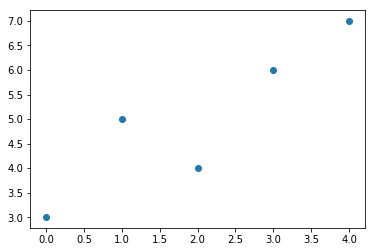

In [64]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
X = np.array([0,1,2,3,4])
Y = np.array([3,5,4,6,7])
plt.scatter(X,Y)

In [66]:
%Rpush X Y
%R lm(Y~X)$coef

ERROR:root:Line magic function `%Rpush` not found.
ERROR:root:Line magic function `%R` not found.


In [68]:
%%R -i X,Y -o XYcoef

ERROR:root:Cell magic `%%R` not found.


In [71]:
%%timeit

UsageError: %%timeit is a cell magic, but the cell body is empty. Did you mean the line magic %timeit (single %)?


In [72]:
%cd

C:\Users\Pengbing


In [73]:
%%cmd
ping www.google.com

Microsoft Windows [版本 10.0.15063]
(c) 2017 Microsoft Corporation。保留所有权利。

C:\Users\Pengbing>ping www.google.com

正在 Ping www.google.com [216.58.200.192] 具有 32 字节的数据:
来自 216.58.200.192 的回复: 字节=32 时间=66ms TTL=50
来自 216.58.200.192 的回复: 字节=32 时间=120ms TTL=50
来自 216.58.200.192 的回复: 字节=32 时间=65ms TTL=50
请求超时。

216.58.200.192 的 Ping 统计信息:
    数据包: 已发送 = 4，已接收 = 3，丢失 = 1 (25% 丢失)，
往返行程的估计时间(以毫秒为单位):
    最短 = 65ms，最长 = 120ms，平均 = 83ms

C:\Users\Pengbing>